This project focusses on the importance of understanding the carbon capacity of the atmosphere, and where we are as a result of our combined actions over the past century. We will first look at the mean temp over the years and analyze the data points to predict what our projected outcome looks like. 

Our goal here is to find a likely time where we would hit an excess temperature of around 2 degrees celcius. The general concencus amongst the scientific community says that an average increase in just 2 degrees could result in catastrophic amounts of damage. This would be due to sea level rises, increase in abnormal weather, and extinctions amongst other things. https://climate.nasa.gov/news/2865/a-degree-of-concern-why-global-temperatures-matter/

Through the use of data analysis we would like to see if it is too late for us or if we have the opportunity to reverse that damage, and what that reversal might look like. 

In [1]:
import pandas as pd
import datapackage
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
%matplotlib inline
from plotnine import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  

First from the nasa website let's obtain the most recent land and ocean data set on world wide temperatures. We have to wrangle the data and trim off unnecessary rows in order to only be left with the relevant data.

In [2]:
file = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
temp_data = pd.read_csv(file, sep="     ", header=None, names=["year", "temp", "temp_s"], engine = 'python')

In [3]:
temp_data = temp_data[4:]

In [4]:
temp_data

year  temp  temp_s
4    1880 -0.15   -0.08
5    1881 -0.07   -0.11
6    1882 -0.09   -0.15
7    1883 -0.16   -0.19
8    1884 -0.27   -0.22
..    ...   ...     ...
139  2015  0.90    0.83
140  2016  1.02    0.87
141  2017  0.93    0.92
142  2018  0.86    0.95
143  2019  0.99    0.99

[140 rows x 3 columns]

In [5]:
temp_years = []
for i in temp_data.year: 
    temp_years.append(int(i))

temp_data["year"] = temp_years

Here we can take are weather anomaly data and plot it with a linear regression line that we've trained using sklearn's built in machine learning algorithm. 

As we can see from the following plot there seems to be an exponential trend of the data from the 60's to the late 2010's. 

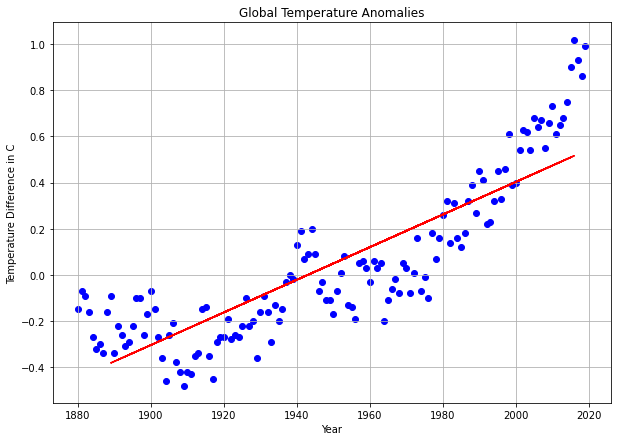

In [6]:
X = np.array(temp_years).reshape(-1, 1) 
y = np.array(temp_data['temp']).reshape(-1, 1) 
temp_data.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test) 
plt.figure(figsize=(10,7))
plt.grid()
plt.scatter(temp_years, temp_data['temp'], color ='b') 
plt.plot(X_test, y_pred, color ='r') 
plt.xlabel("Year")
plt.ylabel("Temperature Difference in C")
plt.title("Global Temperature Anomalies")
plt.show()

In [7]:
year_temp = 2020
year_temp_r = []
for i in range(0, 29): 
    year_temp_r.append([year_temp + i])

In [8]:
all_mean = regr.predict(year_temp_r)

   
   
   
   If we then project our linear regression model to the future we are then able to see the general trend in temperature increase that our model has come up with. However, this rate of change seems too slow. From the data that we've collected we can see that by 2019 there has already been over a 1 degree increase in temperature, and this model tells us that we won't reach that temperature by 2050.
   
   
   
   

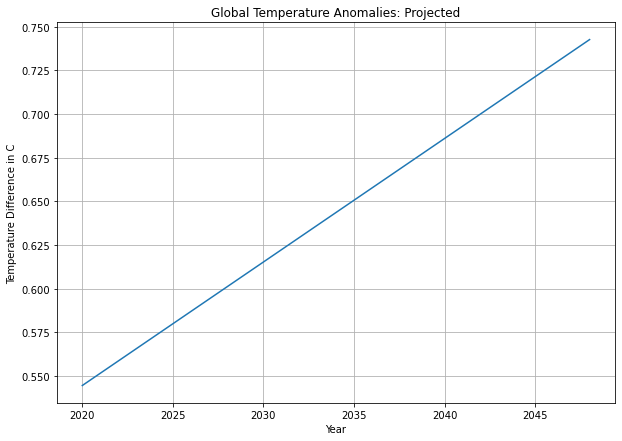

In [9]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Temperature Difference in C")
plt.title("Global Temperature Anomalies: Projected")
plt.plot(year_temp_r, all_mean);
plt.show(); 

To adjust for this let's take only the 10 most recent years in the data and add a linear regression model onto that 

In [10]:
temp_data_10 = temp_data[130:].copy()
temp_data_10

year  temp  temp_s
134  2010  0.73    0.65
135  2011  0.61    0.67
136  2012  0.65    0.70
137  2013  0.68    0.74
138  2014  0.75    0.79
139  2015  0.90    0.83
140  2016  1.02    0.87
141  2017  0.93    0.92
142  2018  0.86    0.95
143  2019  0.99    0.99

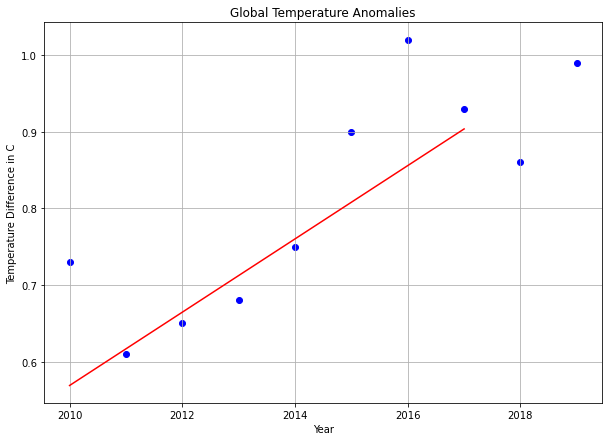

In [11]:
X = np.array(temp_data_10['year']).reshape(-1, 1) 
y = np.array(temp_data_10['temp']).reshape(-1, 1) 
temp_data_10.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test) 
plt.figure(figsize=(10,7))
plt.scatter(temp_data_10['year'], temp_data_10['temp'], color ='b') 
plt.plot(X_test, y_pred, color ='r') 
plt.xlabel("Year")
plt.ylabel("Temperature Difference in C")
plt.title("Global Temperature Anomalies")
plt.grid()
plt.show()

If we look at the rate of change of this new graph that's been projected we can see that in just 30 years we can exceed our target of 2 degree celcius increase from our initial starting point of zero. 

We've now found our date at which all carbon emissions need to be stopped before we hit our doom temperature of 2 degrees. 

Text(0.5, 1.0, 'Global Temperature Anomalies: Projected')

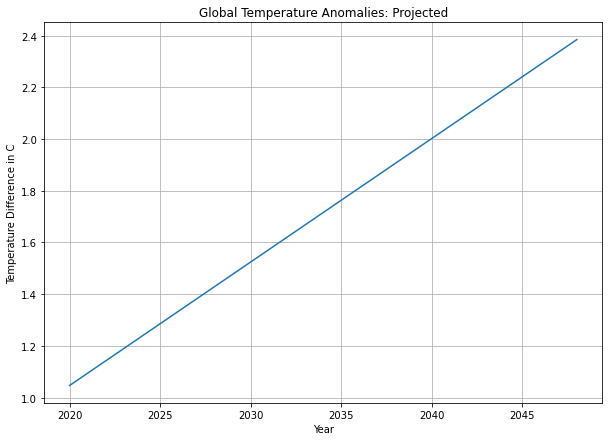

In [12]:
predict_10 = regr.predict(year_temp_r)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(year_temp_r, predict_10);
plt.xlabel("Year")
plt.ylabel("Temperature Difference in C")
plt.title("Global Temperature Anomalies: Projected")

In [13]:
carbon_data = pd.read_csv('global_carbon.csv')

To get a better understanding of the data let's combine both the total carbon produced by the world and compare it against the global temperature rise. 

In [14]:
carbon_data = carbon_data.rename(columns=
    {"Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)": "Total", 
    "Carbon emissions from gas fuel consumption": "gas_fuel", 
    "Carbon emissions from liquid fuel consumption": "liquid_fuel", 
    "Carbon emissions from solid fuel consumption": "solid_fuel", 
    "Carbon emissions from cement production": "cement", 
    "Carbon emissions from gas flaring": "flaring", 
    "Per capita carbon emissions (metric tons of carbon; after 1949 only)": "per_capita"})

In [15]:
carbon_data = carbon_data[130:]

In [16]:
carbon_data

Year Total gas_fuel  liquid_fuel  solid_fuel  cement  flaring  per_capita
130  1880   236        0          3.0       233.0     0.0      0.0         NaN
131  1881   243        0          4.0       239.0     0.0      0.0         NaN
132  1882   256        0          4.0       252.0     0.0      0.0         NaN
133  1883   272        0          3.0       269.0     0.0      0.0         NaN
134  1884   275        0          4.0       271.0     0.0      0.0         NaN
..    ...   ...      ...          ...         ...     ...      ...         ...
260  2010  9128     1696       3107.0      3812.0   446.0     67.0        1.32
261  2011  9503     1756       3134.0      4055.0   494.0     64.0        1.36
262  2012  9673     1783       3200.0      4106.0   519.0     65.0        1.36
263  2013  9773     1806       3220.0      4126.0   554.0     68.0        1.36
264  2014  9855     1823       3280.0      4117.0   568.0     68.0        1.36

[135 rows x 8 columns]

Unfortunately the data frame has the years written in strings. In order for our plot to look evenly spaced we need to first convert the 'strings' to 'ints' then feed them into our plot. 

In [17]:
carbon_years = []
for i in carbon_data.Year: 
    carbon_years.append(int(i))
total = [] 
for i in carbon_data.Total: 
    total.append(int(i))

As we can see the current amount of carbon produced by the world is rising exponentially, but barely seems to be tapering off towards the end. 

[Text(0, 0.5, 'Carbon Emission'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Carbon Emissions to Year')]

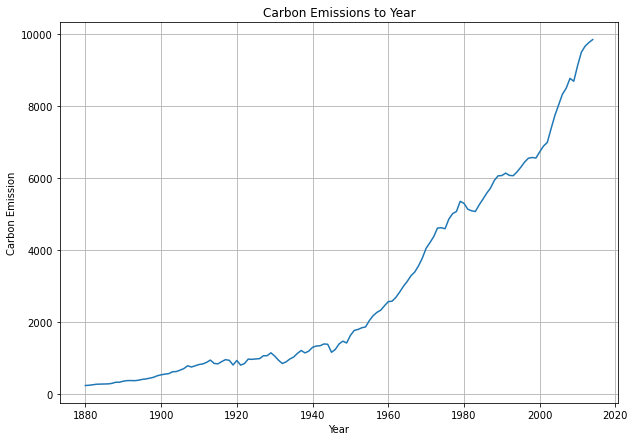

In [18]:
x = carbon_years
y = total

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x,y)
ax.grid()
ax.set(xlabel='Year', ylabel='Carbon Emission',
       title='Carbon Emissions to Year')

In [19]:
carbon_data

Year Total gas_fuel  liquid_fuel  solid_fuel  cement  flaring  per_capita
130  1880   236        0          3.0       233.0     0.0      0.0         NaN
131  1881   243        0          4.0       239.0     0.0      0.0         NaN
132  1882   256        0          4.0       252.0     0.0      0.0         NaN
133  1883   272        0          3.0       269.0     0.0      0.0         NaN
134  1884   275        0          4.0       271.0     0.0      0.0         NaN
..    ...   ...      ...          ...         ...     ...      ...         ...
260  2010  9128     1696       3107.0      3812.0   446.0     67.0        1.32
261  2011  9503     1756       3134.0      4055.0   494.0     64.0        1.36
262  2012  9673     1783       3200.0      4106.0   519.0     65.0        1.36
263  2013  9773     1806       3220.0      4126.0   554.0     68.0        1.36
264  2014  9855     1823       3280.0      4117.0   568.0     68.0        1.36

[135 rows x 8 columns]

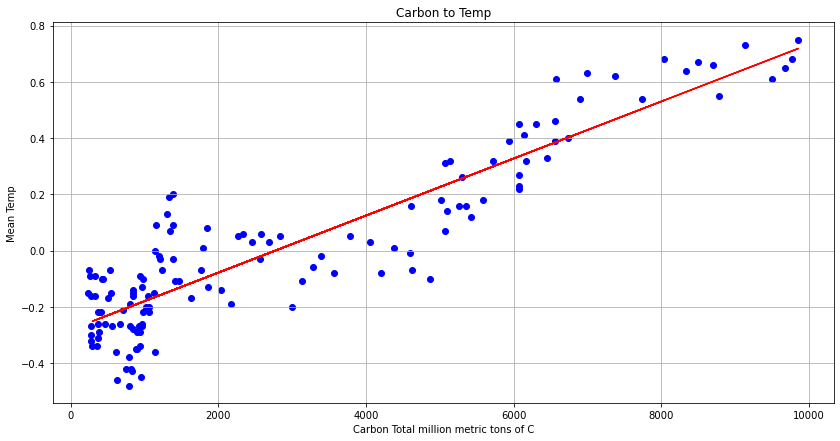

In [20]:
X = np.array(total).reshape(-1, 1) 
y = np.array(temp_data.temp[:135]).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)  
plt.figure(figsize=(14, 7))
plt.grid()
plt.scatter(total, temp_data.temp[:135], color ='b') 
plt.plot(X_test, y_pred, color ='r') 
plt.xlabel("Carbon Total million metric tons of C")
plt.ylabel("Mean Temp")
plt.title("Carbon to Temp")
plt.show()

In [21]:
c_p = 10000
carbon_pred = []
for i in range(4000): 
    carbon_pred.append([c_p + i])

Projecting this out further indicates that we still have a decent amount of wiggle room before the total amount of carbon in the atmosphere get's us to +2 degrees. 

Text(0.5, 1.0, 'Carbon to Temp: Projected')

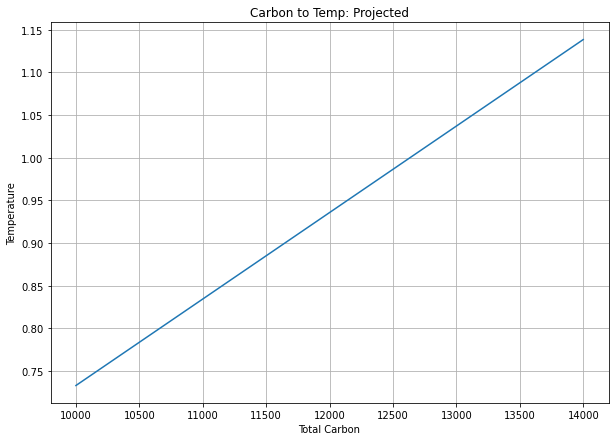

In [22]:
predict_carbon = regr.predict(carbon_pred)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(carbon_pred, predict_carbon);
plt.xlabel("Total Carbon")
plt.ylabel("Temperature")
plt.title("Carbon to Temp: Projected")

There are two ways we can stop the use of fossil fuels. 

The first way is to effect supply. There is a fundamental time limit on all fossil fuel products and what better way to motivate the market to move to non emissions type vehicles than to run out of the fuel to burn. Let's observe and plot a few statistics about oil in order to see whether we can simply rely on the natural market forces to push us into non emissions type energy. 

First let's translate our oil excel file into a readable data frame. 

In [23]:
oil_data = pd.read_excel(open('oil.xls', 'rb'),
              sheet_name='Data 1')  

In [24]:
oil_data.head()

Back to Contents  \
0            Sourcekey   
1                 Date   
2  1900-06-30 00:00:00   
3  1901-06-30 00:00:00   
4  1902-06-30 00:00:00   

  Data 1: U.S. Field Production of Crude Oil (Thousand Barrels)  
0                                           MCRFPUS1             
1  U.S. Field Production of Crude Oil (Thousand B...             
2                                              63621             
3                                              69389             
4                                              88767

In [25]:
oil_data = oil_data[2:]

In [26]:
year = []
y = 1900
for i in range(0, 120):
    b = y + i
    year.append(b)

In [27]:
oil_data["year"] = year

In [28]:
oil_data = oil_data.drop(columns='Back to Contents')

In [29]:
oil_data = oil_data.rename(columns=
    {"Data 1: U.S. Field Production of Crude Oil (Thousand Barrels)": "oil"})

We needed to remove a few information based rows at the top. Then from there we need to convert all the yyyy-mm-dd formated strings to simply just year so that we can have an easier time running and plotting the graphs. 

In [30]:
oil_data

oil  year
2      63621  1900
3      69389  1901
4      88767  1902
5     100461  1903
6     117081  1904
..       ...   ...
117  3445138  2015
118  3235183  2016
119  3413417  2017
120  4011521  2018
121  4464808  2019

[120 rows x 2 columns]

Going into the 2000's it looked like we were on track to run out of crude oil, but recent advances in mining technology such as fracking and even Artificial Intelligence are making it easier to both mine and find oil deposits buried deep within the earths crust. 

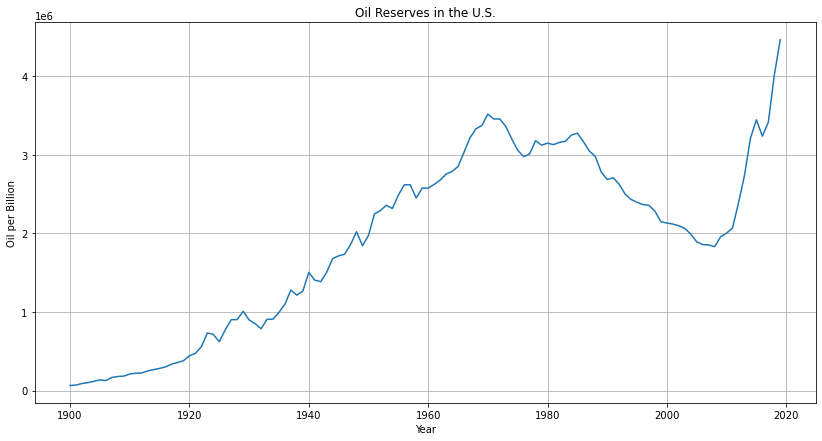

In [31]:
y = oil_data.oil 
x = oil_data.year

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(x, y)
ax.set(xlabel='Year', ylabel='Oil per Billion',
       title='Oil Reserves in the U.S.')
ax.grid()
plt.show()

We can safely assume that we will find more oil in the foreseable future so much so that when we put a linear regression function over it, it slopes up quite steeply roughly stating that every 40 years we will find and put away another billion barrels of oil. 

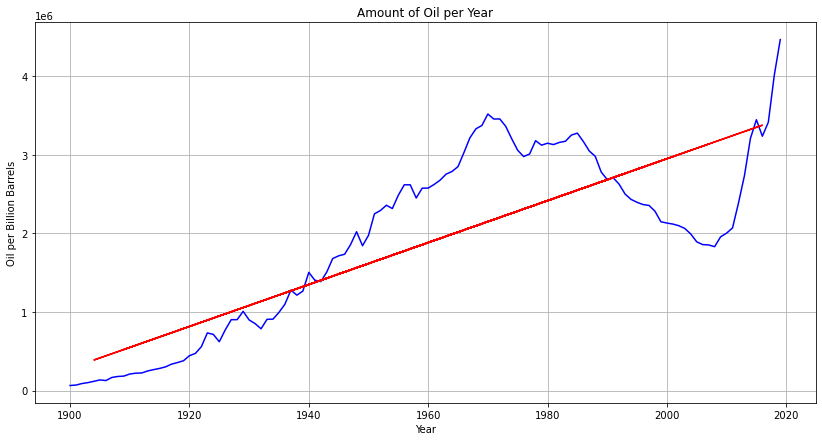

In [32]:
X = np.array(oil_data.year).reshape(-1, 1) 
y = np.array(oil_data.oil).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)  
plt.figure(figsize=(14, 7))
plt.grid()
plt.plot(oil_data.year, oil_data.oil, color ='b') 
plt.plot(X_test, y_pred, color ='r') 
plt.xlabel("Year")
plt.ylabel("Oil per Billion Barrels")
plt.title("Amount of Oil per Year")
plt.show()   

But it is ultimately not the supply of oil that dictates whether oil becomes an attractive commodity for the consumer to purchase. It ultimately comes down to the price of oil per barrel that will determine whether we will keep using it.



First let's bring in our oil price index. This index records the spot price of a barrel of oil in a given year. We're going to be using the Cushing, OK WTI spot price as it relates closer to American Markets. 

In [33]:
price_data = pd.read_excel(open('oil_price.xls', 'rb'),
              sheet_name='Data 1')  

In [34]:
price_data.head()

Back to Contents                                  Data 1: Crude Oil  \
0            Sourcekey                                               RWTC   
1                 Date  Cushing, OK WTI Spot Price FOB (Dollars per Ba...   
2  1986-06-30 00:00:00                                              15.05   
3  1987-06-30 00:00:00                                               19.2   
4  1988-06-30 00:00:00                                              15.97   

                                         Unnamed: 2  
0                                             RBRTE  
1  Europe Brent Spot Price FOB (Dollars per Barrel)  
2                                               NaN  
3                                             18.53  
4                                             14.91

In [35]:
price_data = price_data[2:]

In [36]:
price = []
for i in price_data.iloc[:,1]: 
    price.append(i)

In [37]:
year = 1986 
years = []
for i in range (0,len (price_data.iloc[:,0])): 
    years.append(year + i)

After some data wrangling and date conversion we can take a look at the price at which oil can be purchased. However, unsuprisingly we find that generally the price of oil goes down along side its rise in supply. Because of this gas will not become prohibitively any time in the near future. 

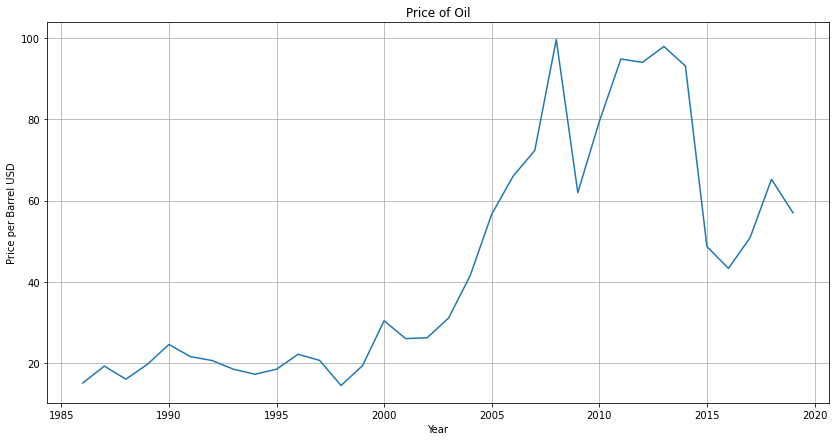

In [38]:
y = price
x = years

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(x, y)
ax.set(xlabel='Year', ylabel='Price per Barrel USD',
       title='Price of Oil')
ax.grid()
plt.show()

This now leaves us with the problem of having too much oil for consumption. By burning our entire supply of crude oil would put us way above our target mean temperature. If we can't let natural market forces change our way of supplying our transportation needs then it becomes up to us the consumer in order to choose reduced or zero emissions type vehicles.  

With that in mind let's look at the velocity at which EV's are hitting the market today. 

In [39]:
vehicle_data = pd.read_excel(open('e_vehicle.xlsx', 'rb'),
              sheet_name='PEV Sales Final 2019') 

In [40]:
vehicle_data

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0          NaN  U.S. PEV Sales by Model (In Order of Market In...        NaN   
1          NaN                                            Vehicle       Type   
2          NaN                                         Chevy Volt       PHEV   
3          NaN                                        Nissan Leaf         EV   
4          NaN                                           Smart ED         EV   
..         ...                                                ...        ...   
63         NaN                         Last updated: January 2020        NaN   
64         NaN                                          Acronyms:        NaN   
65         NaN                           EV: All-electric vehicle        NaN   
66         NaN  PEV: Plug-in electric vehicle. These include b...        NaN   
67         NaN  PHEV: Plug-in hybrid electric vehicle. These i...        NaN   

    Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1       2011.0      2012.0      2013.0      2014.0      2015.0      2016.0   
2       7671.0     23461.0     23094.0     18805.0     15393.0     24739.0   
3       9674.0      9819.0     22610.0     30200.0     17269.0     14006.0   
4        342.0       139.0       923.0      2594.0      1387.0       657.0   
..         ...         ...         ...         ...         ...         ...   
63         NaN         NaN         NaN         NaN         NaN         NaN   
64         NaN         NaN         NaN         NaN         NaN         NaN   
65         NaN         NaN         NaN         NaN         NaN         NaN   
66         NaN         NaN         NaN         NaN         NaN         NaN   
67         NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 9  Unnamed: 10  Unnamed: 11 Unnamed: 12  
0          NaN          NaN          NaN         NaN  
1       2017.0       2018.0       2019.0       Total  
2      20349.0      18306.0       4915.0      156733  
3      11230.0      14715.0      12365.0      141888  
4        544.0       1219.0        680.0        8485  
..         ...          ...          ...         ...  
63         NaN          NaN          NaN         NaN  
64         NaN          NaN          NaN         NaN  
65         NaN          NaN          NaN         NaN  
66         NaN          NaN          NaN         NaN  
67         NaN          NaN          NaN         NaN  

[68 rows x 13 columns]

In [41]:
vehicle = []

for i in vehicle_data.iloc[57,3:12]: 
    vehicle.append(i)

In [42]:
year = 2011 
years = []
for i in range (0,9): 
    years.append(year + i)

In [43]:
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

Growing from a niche environmentalist type of car to now almost being fundamentally better than gasoline competition electric vehicles have soared in popularity over the past decade. This type of growth can be plotted and then projected to see where the future of EV's lies. 

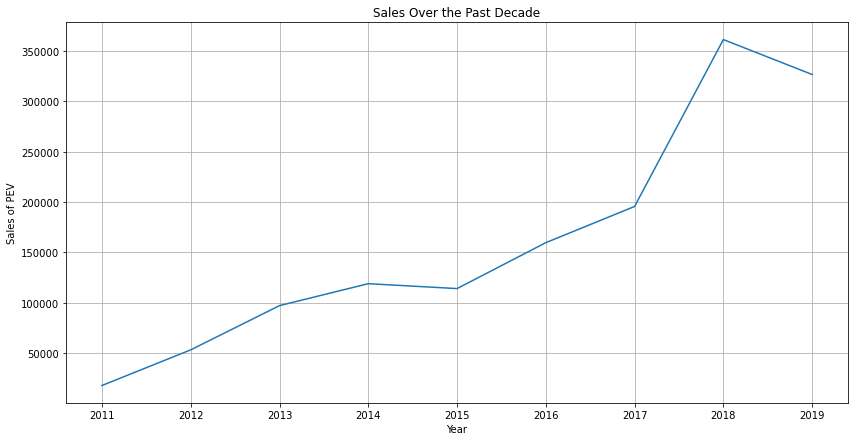

In [44]:
y = vehicle
x = years

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(x, y)
ax.set(xlabel='Year', ylabel='Sales of PEV',
       title='Sales Over the Past Decade')
ax.grid()
plt.show()

In [45]:
x_data = np.array(x)
y_data = np.array(y)

log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
m, b = curve_fit

Let's take an exponential curve then fit it on to our data and it visually it seems we have almost a perfect fit. If we then can combine this data with the total sales of cars in america we can then see what type of potential it has to take over and dominate the market. 

Text(0.5, 1.0, 'PEV cars Sold per Year')

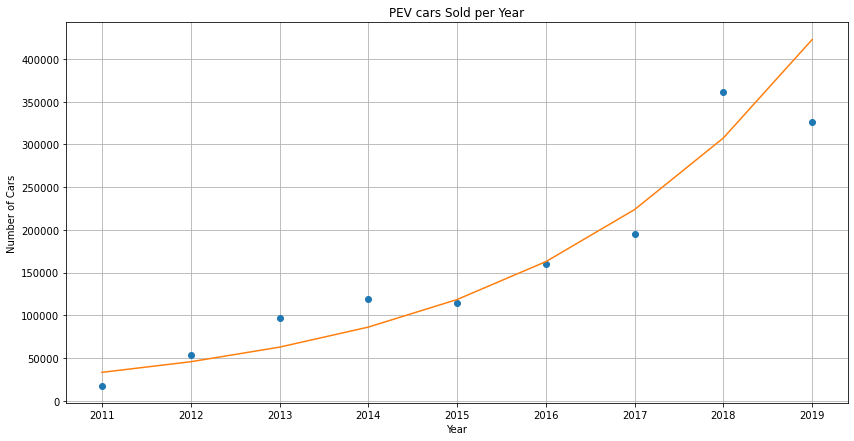

In [46]:
y = np.exp(b) * np.exp(m * x_data)
plt.figure(figsize=(14, 7))
plt.grid()
plt.plot(x_data, y_data, "o")
plt.plot(x_data, y)
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.title("PEV cars Sold per Year")

In [47]:
year_temp = 2011
year_temp_r = []
for i in range(0, 15): 
    year_temp_r.append([year_temp + i])

In [48]:
x_data = np.array(year_temp_r)
exp_y = np.exp(b) * np.exp(m * x_data)

By projecting the growth of EV's just a few years we can see they have tremendous potential to make millions of cars even after the first few years. 

Text(0.5, 1.0, 'PEV cars Sold per Year: Projected')

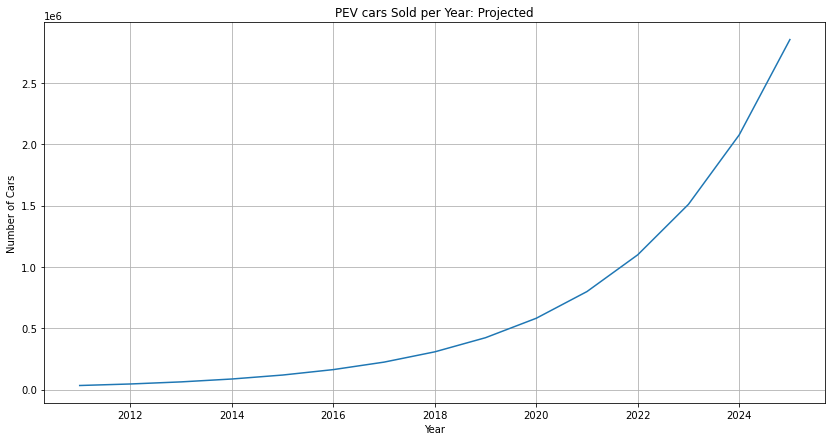

In [49]:
plt.figure(figsize=(14, 7))
plt.grid()
plt.plot(x_data, exp_y)
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.title("PEV cars Sold per Year: Projected")

Let's now take the total amount of cars being sold on the market in America and see what the competition for EV's looks like. 

In [50]:
file = "car_sales.csv"

sales_data = pd.read_csv(file)

In [51]:
years = []
for i in sales_data.DATE: 
    hello = i.split("-")
    years.append(int(hello[0]))

In [52]:
sales_data["DATE"] = years

In [53]:
sales_data = sales_data.groupby(['DATE']).sum()

In [54]:
sales_data["TOTALSA"] = 10000 * sales_data["TOTALSA"]

Even at over 300,000 in car sales EV's still only make up roughly 10% of the total cars sold per year. If we take our car data and add a linear regression line we can see the average amount of cars sold per year along side with the expected growth throughout the years.  

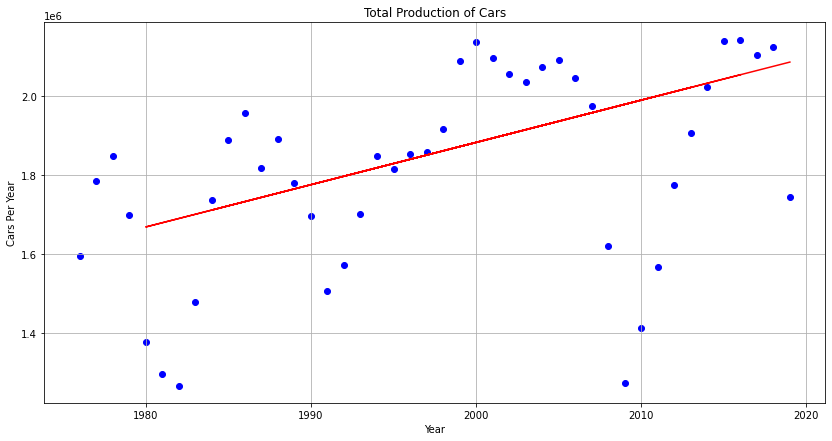

In [55]:
X = np.array(sales_data.index).reshape(-1, 1) 
y = np.array(sales_data.TOTALSA).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)  
plt.figure(figsize=(14, 7))
plt.grid()
plt.scatter(sales_data.index, sales_data.TOTALSA, color ='b') 
plt.plot(X_test, y_pred, color ='r') 
plt.xlabel("Year")
plt.ylabel("Cars Per Year")
plt.title("Total Production of Cars")
plt.show()


Projecting both EV car sales and the linear regression model of cars in America we can see if EV's maintain there velocity in terms of popularity all cars sold in America can be electric by 2024.

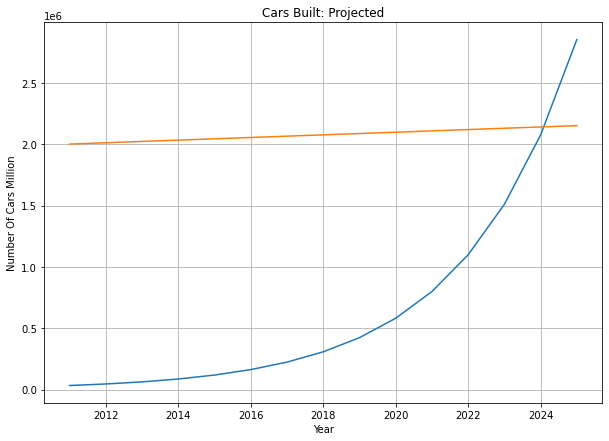

In [56]:
all_mean = regr.predict(year_temp_r)

plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Number Of Cars Million")
plt.title("Cars Built: Projected")
plt.plot(x_data, exp_y)
plt.plot(year_temp_r, all_mean)

Even giving up all fossil fuel based vehicles by 2024 is still cutting it close in terms of carbon emissions. We still have to remember that even though we eliminate the production of fossil fuel based cars we don't take them off the road. The average life of a car is still around 8 years and after that cars have always historically lasted longer. 

From that assumption we are looking at around 10 - 15 years before we can have true zero emissions. With all vehicles being electric by 2024 we can see that if we continue emissions in other areas as well we won't hit our goal of being below 2 degrees in fact we would just be slightly above it. 

Text(0.5, 1.0, 'Global Temperature Anomalies: Projected')

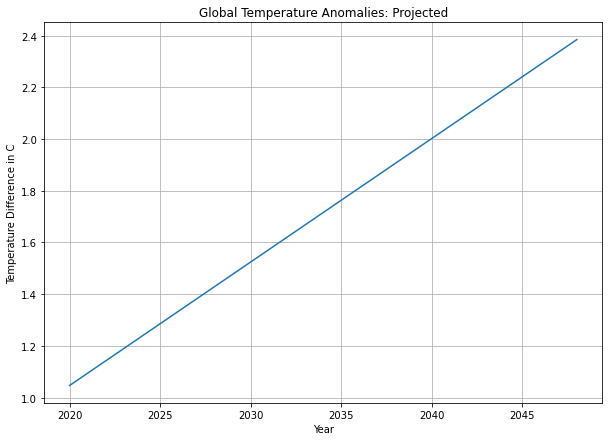

In [57]:
year_temp = 2020
year_temp_r = []
for i in range(0, 29): 
    year_temp_r.append([year_temp + i])

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(year_temp_r, predict_10);
plt.xlabel("Year")
plt.ylabel("Temperature Difference in C")
plt.title("Global Temperature Anomalies: Projected")

In conclusion this is a group effort and while it is deffinitely possible there are a great number of forces working against us.

The U.S. backing out of the Paris agreement puts our goals out of alignment with the rest of the worlds efforts to have a sustainable planet. 

Oil is still prevalent and those who are in possesion of it will eventually like to sell it. 

Fossil fuel based motor companies also don't want to go out of business there have been reforms by Ford, Honda, and Toyota to research and develop EV's, but there overwhelming sales still lie in fossil fuel based cars and as a result there interests lie within selling those cars for as long as they can 

Consumer interest in EV's might go down. While it's cool and now affordable to own a tesla not everyone is going to want to own an electric vehicle. Truck owners for instance are a very picky crowd and would probably be the last to convert over to electric. 

While we still have time time is running out fast and we will have to make a concentrated effort in order to stop the rise of temperature fluctuations. 